In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [3]:
dtSet_df = pd.read_csv('data.csv',index_col='Date of Auction').drop(columns=['Unnamed: 0','MaxPrice (Rs./Kg)'])

df = dtSet_df.copy()
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df['Auctioneer'] = LabelEncoder().fit_transform(df['Auctioneer'])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4244 entries, 2015-01-14 to 2024-05-27
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Auctioneer               4244 non-null   int64  
 1   No. of Lots              4244 non-null   int64  
 2   Total Qty Arrived (Kgs)  4244 non-null   float64
 3   Avg. Price (Rs./Kg)      4244 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 165.8 KB


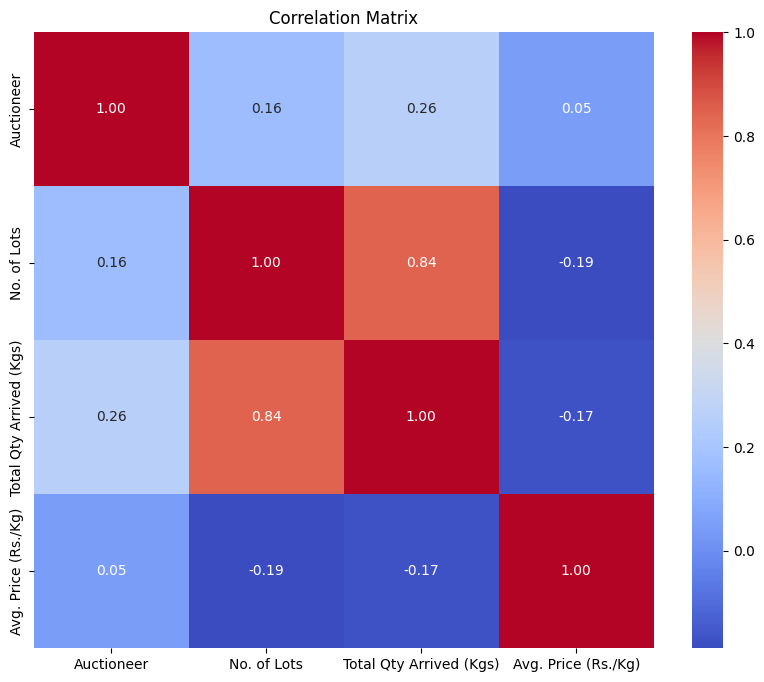

In [4]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [5]:
X = df.drop(columns=['Avg. Price (Rs./Kg)'])
y = df['Avg. Price (Rs./Kg)']

xtr, xte, ytr, yte = train_test_split(X, y, test_size=.1, random_state=42, stratify=X['Auctioneer'])

[0.99999639]


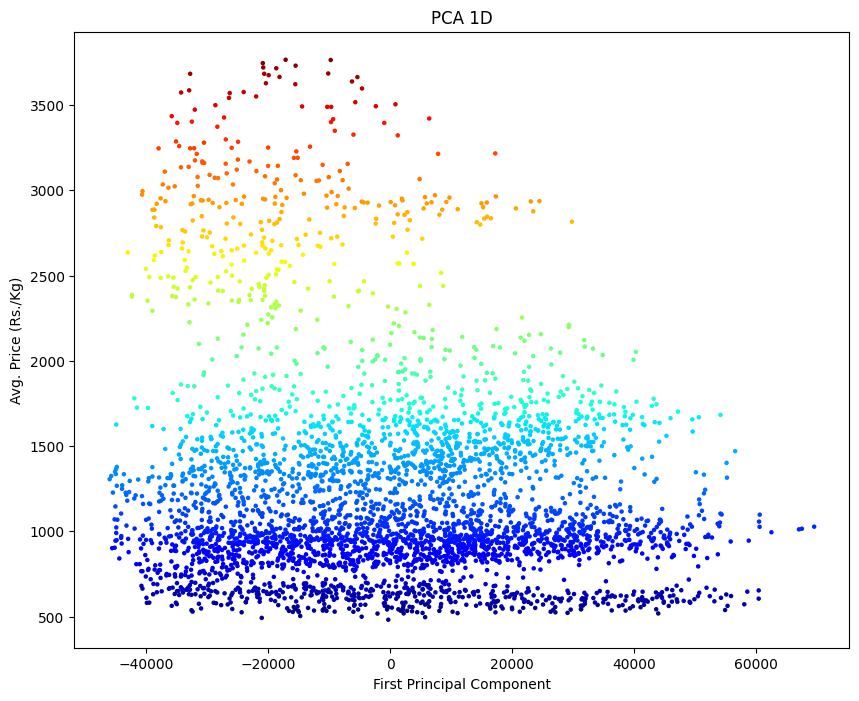

In [6]:
pca1 = PCA(n_components=1)
xtr_pca1 = pca1.fit_transform(xtr)
print(pca1.explained_variance_ratio_)

plt.figure(figsize=(10, 8))
plt.scatter(xtr_pca1,ytr, c=ytr, cmap='jet', s=5)
plt.xlabel('First Principal Component')
plt.ylabel('Avg. Price (Rs./Kg)')
plt.title('PCA 1D')
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(xtr, ytr)
print("PCR :")
print(r2_score(yte, pcr.predict(xte)))
print(mean_squared_error(yte, pcr.predict(xte)))

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(xtr, ytr)
print("\nRF :")
print(r2_score(yte, rfr.predict(xte)))
print(mean_squared_error(yte, rfr.predict(xte)))

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(xtr, ytr)
print("\nGBR :")
print(r2_score(yte, gbr.predict(xte)))
print(mean_squared_error(yte, gbr.predict(xte)))

from sklearn.svm import SVR

svr = SVR()
svr.fit(xtr, ytr)
print("\nSVR :")
print(r2_score(yte, svr.predict(xte)))
print(mean_squared_error(yte, svr.predict(xte)))

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 1]
}

gscv = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5)
gscv.fit(xtr, ytr)
print(gscv.best_params_)
print("\nGS_GBR :")
print(r2_score(yte, gscv.predict(xte)))
print(mean_squared_error(yte, gscv.predict(xte)))


PCR :
0.02972150409873109
456771.2365139211

RF :
0.13192190284420902
408659.0679928351

GBR :
0.16257328529641857
394229.53057373356

SVR :
-0.12885215505737757
531421.8514427746
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}

GS_GBR :
0.1696092287171279
390917.26858926675


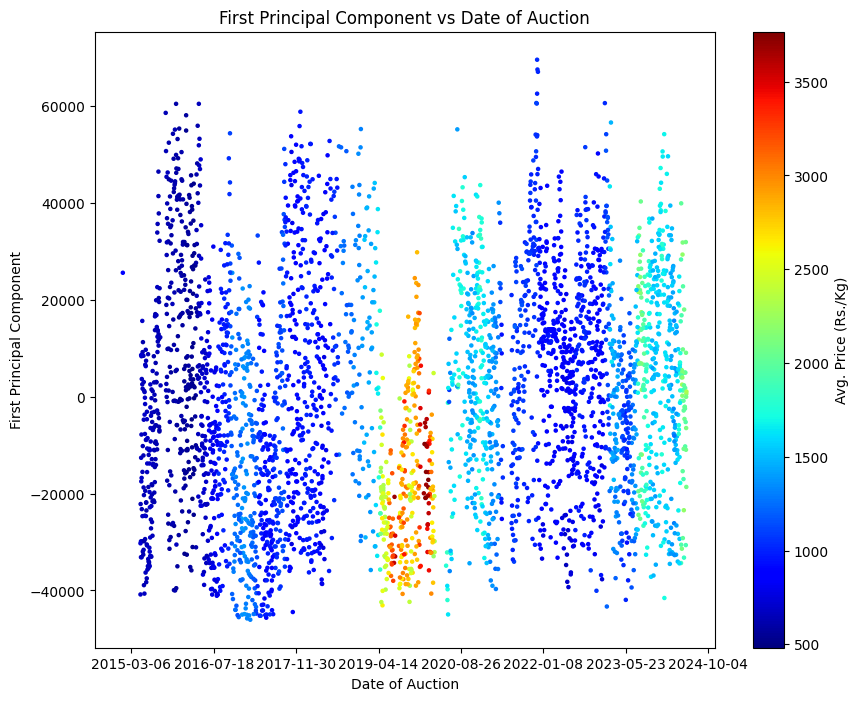

In [13]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 8))
dates_num = mdates.date2num(xtr.index)
sc = ax.scatter(dates_num, xtr_pca1, c=ytr, cmap='jet', s=5)
ax.set_xlabel('Date of Auction')
ax.set_ylabel('First Principal Component')
ax.set_title('First Principal Component vs Date of Auction')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.colorbar(sc, ax=ax, label='Avg. Price (Rs./Kg)')
plt.show()


[9.99996388e-01 3.55982179e-06]


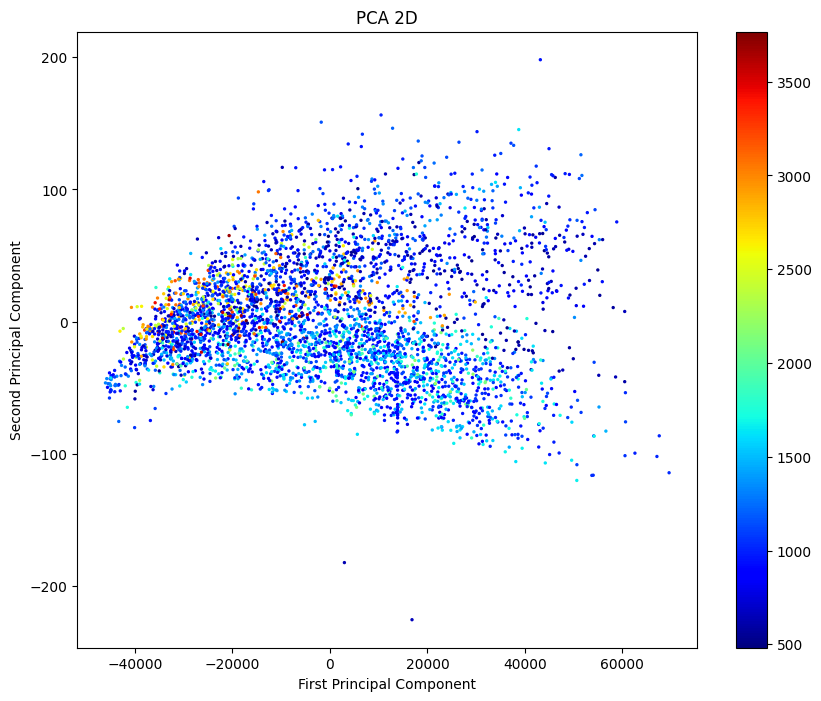

In [14]:
pca2 = PCA(n_components=2)
xtr_pca2 = pca2.fit_transform(xtr)
print(pca2.explained_variance_ratio_)

plt.figure(figsize=(10, 8))
plt.scatter(xtr_pca2[:,0],xtr_pca2[:,1], c=ytr, cmap='jet', s=2)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA 2D')
plt.colorbar()
plt.show()

[9.99996388e-01 3.55982179e-06 5.25607062e-08]


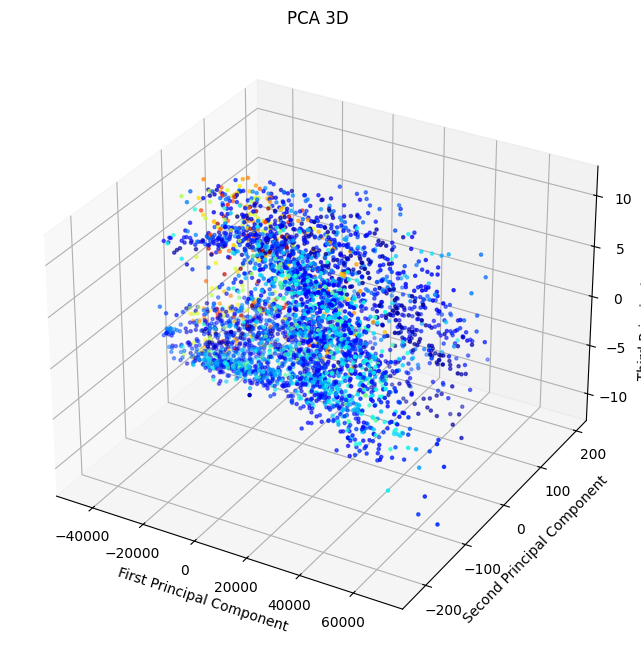

In [15]:
pca3 = PCA(n_components=3)
xtr_pca3 = pca3.fit_transform(xtr)
print(pca3.explained_variance_ratio_)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xtr_pca3[:, 0], xtr_pca3[:, 1], xtr_pca3[:, 2], c=ytr, cmap='jet', s=5)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.set_title('PCA 3D')
plt.show()

# Price as time series

In [16]:
tSeries = dtSet_df['Avg. Price (Rs./Kg)']
tSeries.index = pd.to_datetime(tSeries.index)
tSeries = tSeries.sort_index()
tSeries.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 4244 entries, 2015-01-14 to 2024-05-27
Series name: Avg. Price (Rs./Kg)
Non-Null Count  Dtype  
--------------  -----  
4244 non-null   float64
dtypes: float64(1)
memory usage: 66.3 KB


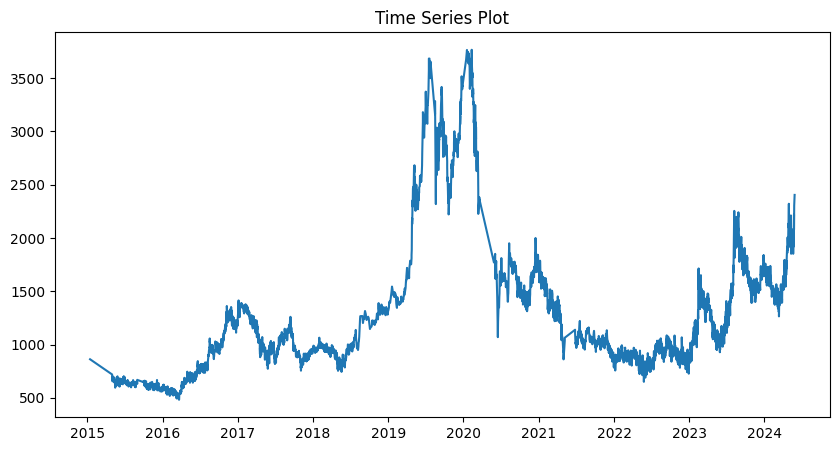

In [17]:
plt.figure(figsize=(10,5))
plt.plot(tSeries)
plt.title('Time Series Plot')
plt.show()

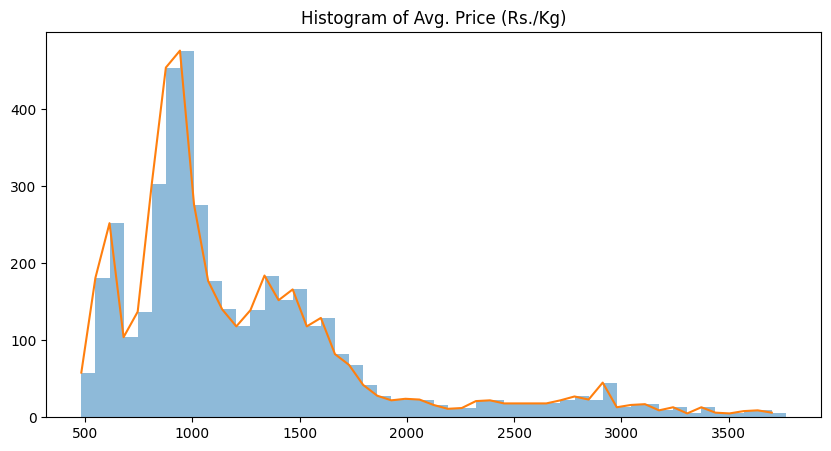

In [18]:
x, y = np.histogram(tSeries,bins=50)
plt.figure(figsize=(10,5))
plt.hist(tSeries, bins = 50,alpha=0.5)
plt.plot(y[:-1], x)
plt.title('Histogram of Avg. Price (Rs./Kg)')
plt.show()